In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

from scipy.interpolate import interp1d

import nanonets_utils
import nanonets

In [2]:
def plot_freq(f, ax, min_y, max_y, N_f=5):

    ax.vlines(f, min_y, max_y, colors='black', linestyles='solid', label=f"$f_0 = {f}$ GHz")

    for n in range(2,N_f+1):
        ax.vlines(n*f, min_y, max_y, colors='#A60628', linestyles='dotted')
    
    return ax

def relate_to_fundamental_freq(signal, f, dt, N_f=10):

    xf, yf  = nanonets_utils.fft(signal, dt, n_padded=65536)
    func    = interp1d(xf, yf)

    vals    = []
    for n in range(1,N_f+1):
        vals.append(func(n*f/10))
    
    return np.array(vals)

## Resistance

In [14]:
dic_R   = {}

for R_val in [50,100,200]:
    dic = {}
    for seed in range(10):
        dic[seed] = {f : pd.read_csv(f"resistance/data/Nx=7_Ny=7_Nz=1_Ne=2_{f}_{R_val}_{seed}.csv") for f in np.round(np.arange(0.3,6,0.2),2)}
    dic_R[R_val] = dic

In [150]:
N_f             = 10
dt              = 1e-10

dic_nonlinear_R = {}

for R_val in [50,100,200]:
    dic_nonlinear   = {}

    for seed, dic_tmp in dic_R[R_val].items():

        df_fft_amplitudes   = pd.DataFrame()
        if seed == 6:
            continue

        for f, df in dic_tmp.items():
            
            signal  = df['Current'].values
            vals    = relate_to_fundamental_freq(signal, f, dt, N_f=N_f)

            df_fft_amplitudes[f] = vals

        df_nonlinear        = df_fft_amplitudes / df_fft_amplitudes.iloc[0,:]
        df_nonlinear        = df_nonlinear.drop(0).reset_index(drop=True)
        df_nonlinear_new    = df_nonlinear.copy()
        df_nonlinear_new    = df_nonlinear_new.set_index(np.arange(2,N_f+1))
        dic_nonlinear[seed] = df_nonlinear_new
    
    dic_nonlinear_R[R_val]  = dic_nonlinear

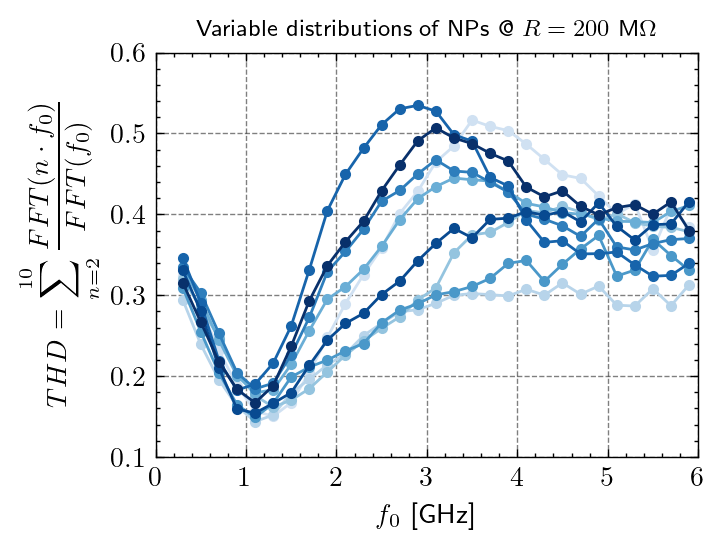

In [183]:
R_val   = 200
cmap    = plt.get_cmap('Blues')

with plt.style.context(["science","muted", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, (seed, df) in enumerate(dic_nonlinear_R[R_val].items()):

        ax  = np.sqrt((df**2).sum()).plot(ax=ax, marker='.', label=f'{seed}', c=cmap((i+2)/10))

    ax.set_ylabel("$THD$ = $\displaystyle\sum_{n=2}^{10}\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$")
    ax.set_xlabel("$f_0$ [GHz]")
    ax.set_xlim(0,6)
    ax.set_ylim(0.1, 0.6)
    ax.set_title(f"Variable distributions of NPs @ $R = {R_val}$ M$\Omega$", fontsize='small')
    fig.savefig(f"plots/harmonic_generation_R_val_{R_val}.png", transparent=True, bbox_inches='tight')
    fig.savefig(f"plots/harmonic_generation_R_val_{R_val}.svg", transparent=True, bbox_inches='tight')

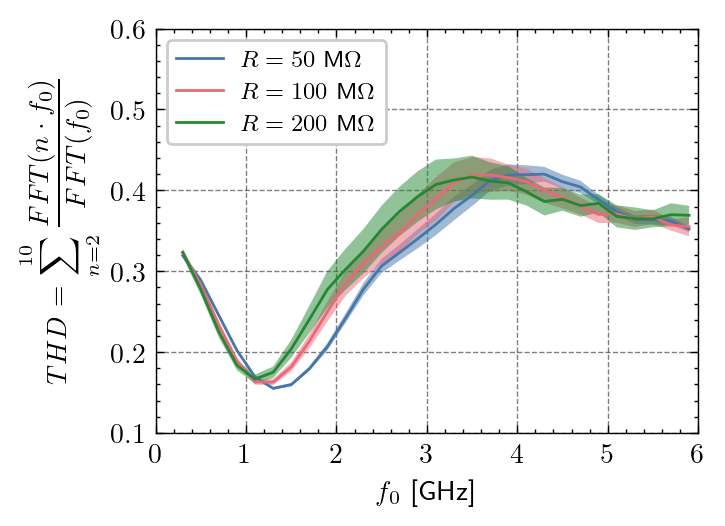

In [171]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for R_val in [50,100,200]:

        means   = pd.DataFrame([list(np.sqrt((dic_nonlinear_R[R_val][i]**2).sum()).values) for i in range(10) if i!= 6]).mean()
        stds    = pd.DataFrame([list(np.sqrt((dic_nonlinear_R[R_val][i]**2).sum()).values) for i in range(10) if i!= 6]).std()/np.sqrt(9)

        ax.plot(dic_nonlinear_R[R_val][i].columns, means, label=f'$R = {R_val}$ M$\Omega$')
        ax.fill_between(dic_nonlinear_R[R_val][i].columns, means-stds, means+stds, alpha=0.5)
    
    ax.set_ylabel("$THD$ = $\displaystyle\sum_{n=2}^{10}\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$")
    ax.set_xlabel("$f_0$ [GHz]")
    ax.set_xlim(0,6)
    ax.set_ylim(0.1, 0.6)
    ax.legend(fontsize='small', loc='upper left')

## Radius

In [159]:
dic_rad = {}

for rad_val in [5,20,40]:
    dic = {}
    for seed in range(10):
        dic[seed] = {f : pd.read_csv(f"radius/data/Nx=7_Ny=7_Nz=1_Ne=2_{f}_{rad_val}_{seed}.csv") for f in np.round(np.arange(0.3,6,0.2),2)}
    dic_rad[rad_val] = dic

In [160]:
N_f                 = 10
dt                  = 1e-10
dic_nonlinear_rad   = {}

for rad_val in [5,20,40]:
    dic_nonlinear   = {}

    for seed, dic_tmp in dic_rad[rad_val].items():

        df_fft_amplitudes   = pd.DataFrame()

        for f, df in dic_tmp.items():
            
            signal  = df['Current'].values
            vals    = relate_to_fundamental_freq(signal, f, dt, N_f=N_f)

            df_fft_amplitudes[f] = vals

        df_nonlinear        = df_fft_amplitudes / df_fft_amplitudes.iloc[0,:]
        df_nonlinear        = df_nonlinear.drop(0).reset_index(drop=True)
        df_nonlinear_new    = df_nonlinear.copy()
        df_nonlinear_new    = df_nonlinear_new.set_index(np.arange(2,N_f+1))
        dic_nonlinear[seed] = df_nonlinear_new
    
    dic_nonlinear_rad[rad_val]  = dic_nonlinear

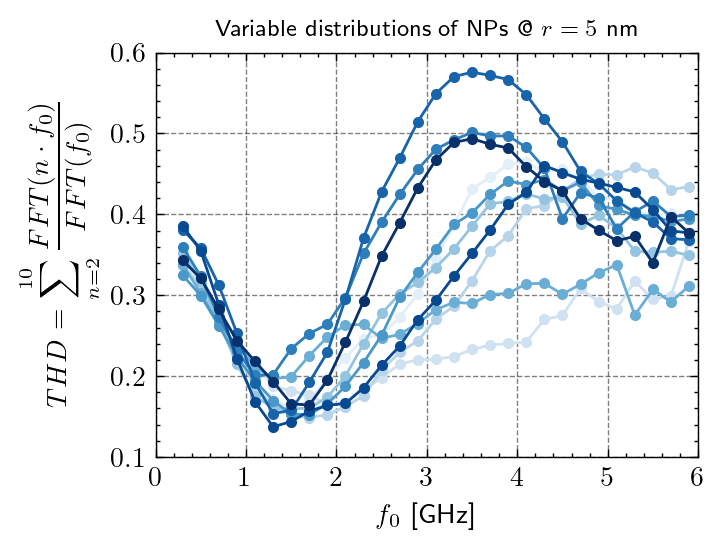

In [177]:
r_val   = 5
cmap    = plt.get_cmap('Blues')

with plt.style.context(["science","muted", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, (seed, df) in enumerate(dic_nonlinear_rad[r_val].items()):

        ax  = np.sqrt((df**2).sum()).plot(ax=ax, marker='.', label=f'{seed}', c=cmap((i+1)/10))

    ax.set_ylabel("$THD$ = $\displaystyle\sum_{n=2}^{10}\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$")
    ax.set_xlabel("$f_0$ [GHz]")
    ax.set_xlim(0,6)
    ax.set_ylim(0.1, 0.6)
    ax.set_title(f"Variable distributions of NPs @ $r = {r_val}$ nm", fontsize='small')
    fig.savefig(f"plots/harmonic_generation_rad_val_{r_val}.png", transparent=True, bbox_inches='tight')
    fig.savefig(f"plots/harmonic_generation_rad_val_{r_val}.svg", transparent=True, bbox_inches='tight')

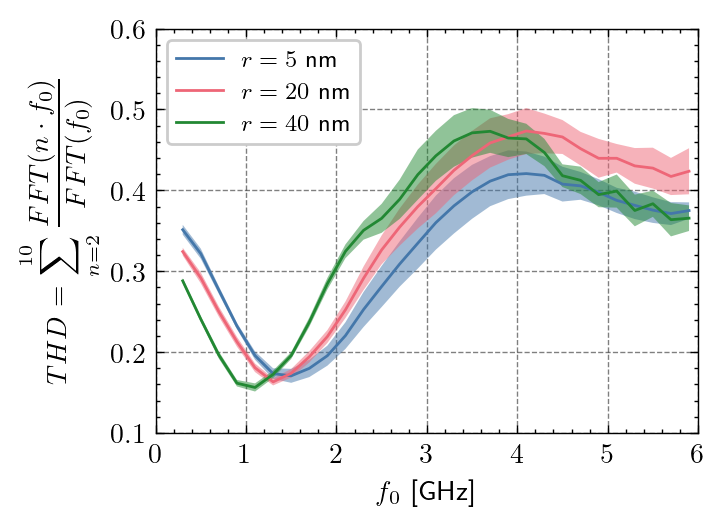

In [168]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for rad_val in [5,20,40]:

        means   = pd.DataFrame([list(np.sqrt((dic_nonlinear_rad[rad_val][i]**2).sum()).values) for i in range(10)]).mean()
        stds    = pd.DataFrame([list(np.sqrt((dic_nonlinear_rad[rad_val][i]**2).sum()).values) for i in range(10)]).std()/np.sqrt(10)

        ax.plot(dic_nonlinear_rad[rad_val][i].columns, means, label=f'$r = {rad_val}$ nm')
        ax.fill_between(dic_nonlinear_rad[rad_val][i].columns, means-stds, means+stds, alpha=0.5)
    
    ax.set_ylabel("$THD$ = $\displaystyle\sum_{n=2}^{10}\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$")
    ax.set_xlabel("$f_0$ [GHz]")
    ax.set_xlim(0,6)
    ax.set_ylim(0.1, 0.6)
    ax.legend(fontsize='small')